In [1]:
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('Gas_sensor_dataset (1) (1) (1).csv')
data.head()

,Temperature (K),Pressure (Mpa),Refrective_Index (n),Dielectric_constant(e),Density1(P_LL),Density2(P_CM),Density3(P_IUPAC),Target
0,323.15,0.50838,1.00188,1.003755,0.019047,0.019082,0.019041,CH4
1,323.15,0.75085,1.00278,1.005564,0.028190,0.028259,0.028207,CH4
2,323.15,1.25370,1.00468,1.009360,0.047480,0.047468,0.047391,CH4
3,323.15,1.50250,1.00563,1.011260,0.057040,0.057063,0.056977,CH4
4,323.15,1.75160,1.00659,1.013175,0.066770,0.066720,0.066627,CH4


In [3]:
X = data[['Temperature (K)', 'Pressure (Mpa)', 'Refrective_Index (n)', 'Dielectric_constant(e)', 
          'Density1(P_LL)', 'Density2(P_CM)', 'Density3(P_IUPAC)']]
y = data['Target']

In [4]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [6]:
X

,Temperature (K),Pressure (Mpa),Refrective_Index (n),Dielectric_constant(e),Density1(P_LL),Density2(P_CM),Density3(P_IUPAC)
0,323.15,0.50838,1.00188,1.003755,0.019047,0.019082,0.019041
1,323.15,0.75085,1.00278,1.005564,0.028190,0.028259,0.028207
2,323.15,1.25370,1.00468,1.009360,0.047480,0.047468,0.047391
3,323.15,1.50250,1.00563,1.011260,0.057040,0.057063,0.056977
4,323.15,1.75160,1.00659,1.013175,0.066770,0.066720,0.066627
...,...,...,...,...,...,...,...
321,308.15,8.39100,1.14014,1.348532,1.369500,1.399600,1.295505
322,308.15,8.50440,1.14425,1.359989,1.408900,1.444500,1.369075
323,308.15,8.62180,1.14765,1.370085,1.441400,1.484100,1.415568
324,308.15,8.73480,1.15031,1.377707,1.466900,1.514100,1.448478


In [7]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)

In [8]:
len(X_train)

244

In [9]:
len(X_test)

82

In [10]:
df0 = data[:47]
df1 = data[50:100]

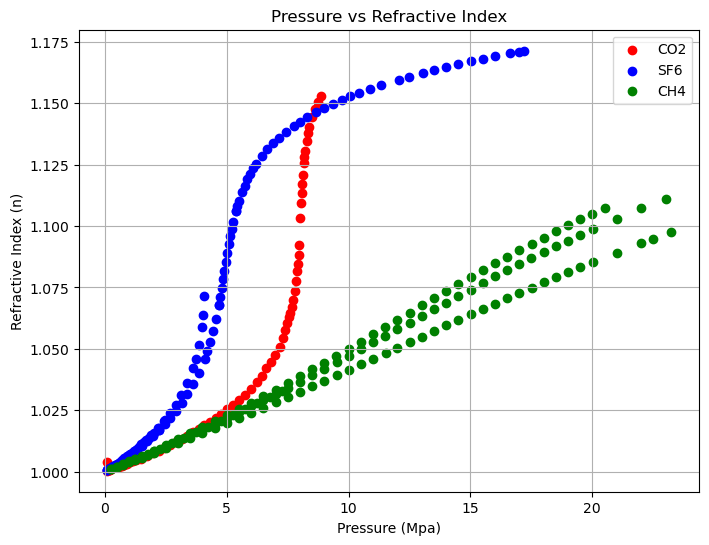

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Gas_sensor_dataset (1) (1) (1).csv')
# Define colors for each gas
colors = {'CO2': 'red', 'SF6': 'blue', 'CH4': 'green'}

# Plot Pressure vs Refractive Index
plt.figure(figsize=(8, 6))

for gas, color in colors.items():
    plt.scatter(data[data['Target'] == gas]['Pressure (Mpa)'],
                data[data['Target'] == gas]['Refrective_Index (n)'],
                c=color, label=gas)

plt.xlabel('Pressure (Mpa)')
plt.ylabel('Refractive Index (n)')
plt.title('Pressure vs Refractive Index')
plt.legend()
plt.grid(True)
plt.show()


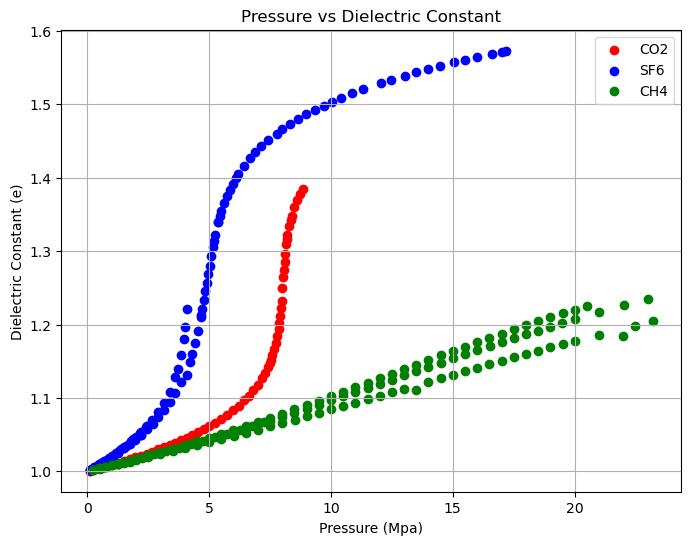

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Gas_sensor_dataset (1) (1) (1).csv')

# Define colors for each gas
colors = {'CO2': 'red', 'SF6': 'blue', 'CH4': 'green'}

# Plot Pressure vs Dielectric Constant
plt.figure(figsize=(8, 6))

for gas, color in colors.items():
    plt.scatter(data[data['Target'] == gas]['Pressure (Mpa)'],
                data[data['Target'] == gas]['Dielectric_constant(e)'],
                c=color, label=gas)

plt.xlabel('Pressure (Mpa)')
plt.ylabel('Dielectric Constant (e)')
plt.title('Pressure vs Dielectric Constant')
plt.legend()
plt.grid(True)
plt.show()


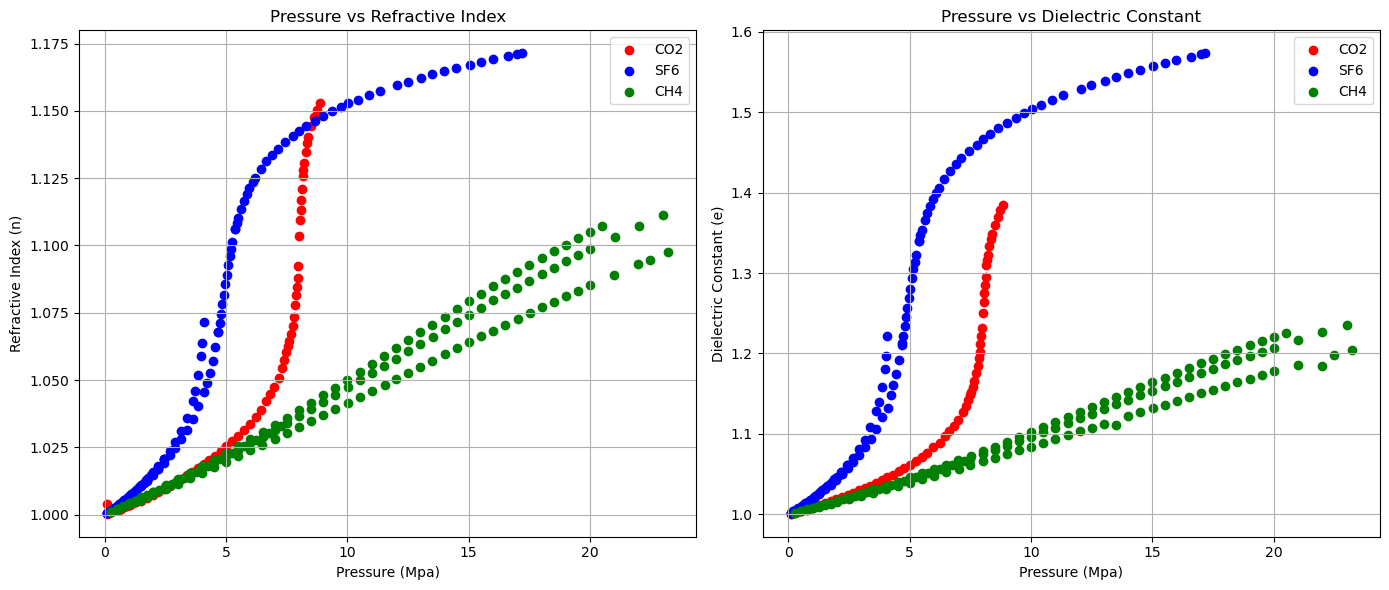

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Gas_sensor_dataset (1) (1) (1).csv')

# Define colors for each gas
colors = {'CO2': 'red', 'SF6': 'blue', 'CH4': 'green'}

# Plot Pressure vs Refractive Index and Pressure vs Dielectric Constant using subplots
plt.figure(figsize=(14, 6))

# Plot Pressure vs Refractive Index
plt.subplot(1, 2, 1)
for gas, color in colors.items():
    plt.scatter(data[data['Target'] == gas]['Pressure (Mpa)'],
                data[data['Target'] == gas]['Refrective_Index (n)'],
                c=color, label=gas)
plt.xlabel('Pressure (Mpa)')
plt.ylabel('Refractive Index (n)')
plt.title('Pressure vs Refractive Index')
plt.legend()
plt.grid(True)

# Plot Pressure vs Dielectric Constant
plt.subplot(1, 2, 2)
for gas, color in colors.items():
    plt.scatter(data[data['Target'] == gas]['Pressure (Mpa)'],
                data[data['Target'] == gas]['Dielectric_constant(e)'],
                c=color, label=gas)
plt.xlabel('Pressure (Mpa)')
plt.ylabel('Dielectric Constant (e)')
plt.title('Pressure vs Dielectric Constant')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

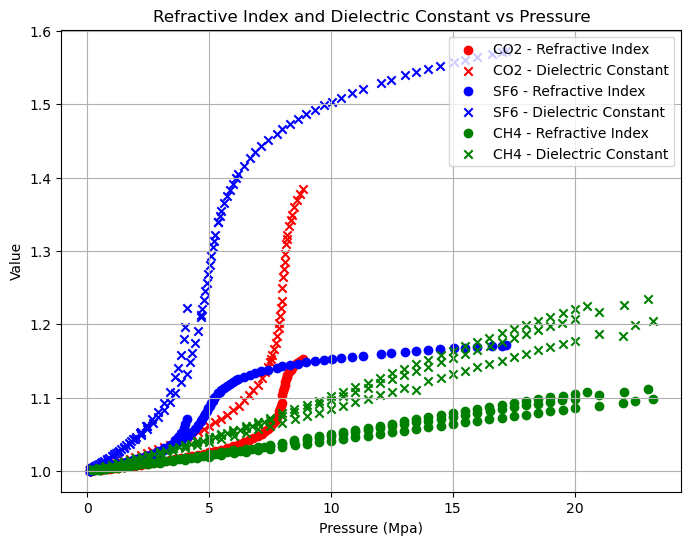

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Gas_sensor_dataset (1) (1) (1).csv')

# Define colors for each gas
colors = {'CO2': 'red', 'SF6': 'blue', 'CH4': 'green'}

# Plot Refractive Index vs Pressure and Dielectric Constant vs Pressure in one plot
plt.figure(figsize=(8, 6))

for gas, color in colors.items():
    plt.scatter(data[data['Target'] == gas]['Pressure (Mpa)'],
                data[data['Target'] == gas]['Refrective_Index (n)'],
                c=color, label=f'{gas} - Refractive Index')
    plt.scatter(data[data['Target'] == gas]['Pressure (Mpa)'],
                data[data['Target'] == gas]['Dielectric_constant(e)'],
                c=color, marker='x', label=f'{gas} - Dielectric Constant')

plt.xlabel('Pressure (Mpa)')
plt.ylabel('Value')
plt.title('Refractive Index and Dielectric Constant vs Pressure')
plt.legend()
plt.grid(True)
plt.show()

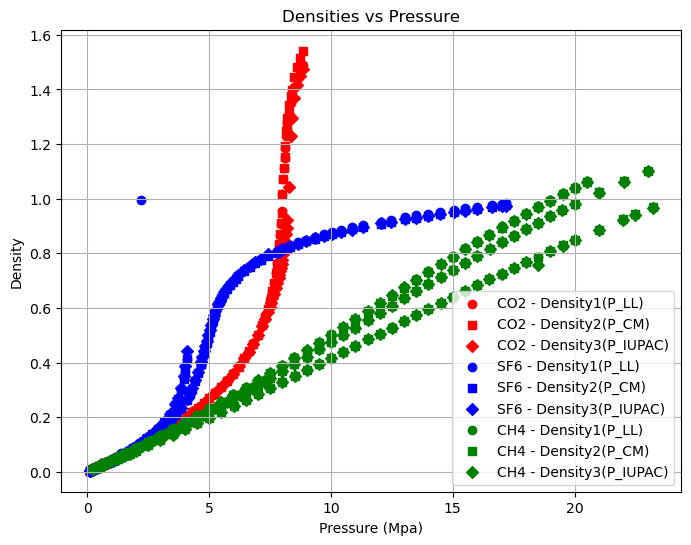

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Gas_sensor_dataset (1) (1) (1).csv')

# Define colors for each gas
colors = {'CO2': 'red', 'SF6': 'blue', 'CH4': 'green'}

# Define markers for each density
markers = ['o', 's', 'D']

# Plot Density1, Density2, and Density3 vs Pressure in one plot
plt.figure(figsize=(8, 6))

for gas, color in colors.items():
    for i, density in enumerate(['Density1(P_LL)', 'Density2(P_CM)', 'Density3(P_IUPAC)']):
        plt.scatter(data[data['Target'] == gas]['Pressure (Mpa)'],
                    data[data['Target'] == gas][density],
                    c=color, marker=markers[i], label=f'{gas} - {density}')

plt.xlabel('Pressure (Mpa)')
plt.ylabel('Density')
plt.title('Densities vs Pressure')
plt.legend()
plt.grid(True)
plt.show()

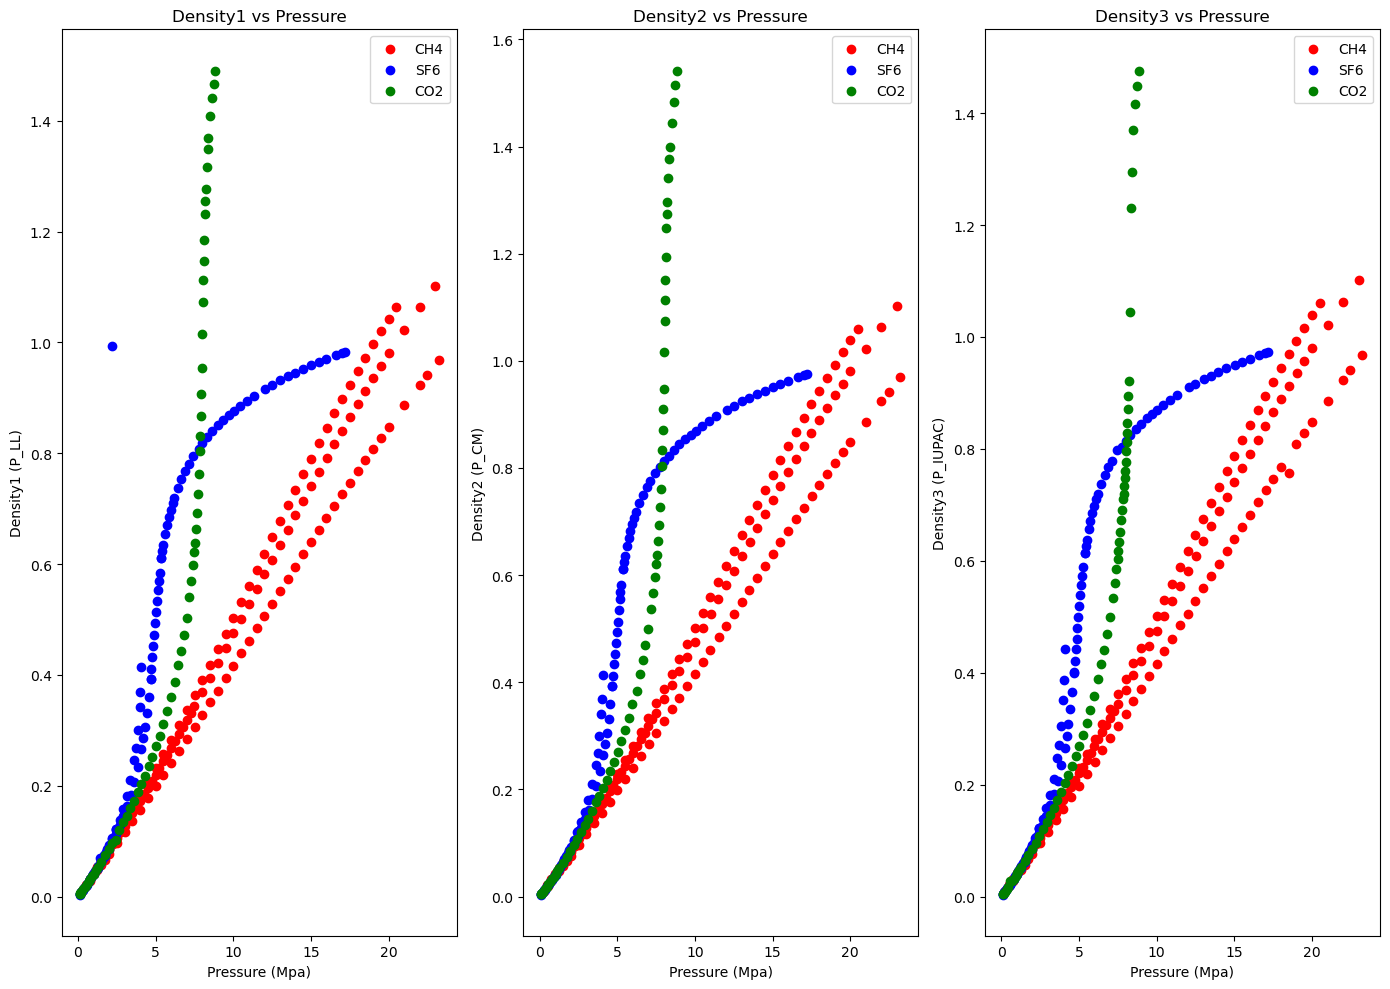

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Gas_sensor_dataset (1) (1) (1).csv')

# Define colors for each gas
colors = {'CH4': 'red', 'SF6': 'blue', 'CO2': 'green'}

# Plot all densities vs Pressure using subplots
plt.figure(figsize=(14, 10))

# Plot Density1 vs Pressure
plt.subplot(1, 3, 1)
for gas, color in colors.items():
    plt.scatter(data[data['Target'] == gas]['Pressure (Mpa)'],
                data[data['Target'] == gas]['Density1(P_LL)'],
                c=color, label=gas)
plt.xlabel('Pressure (Mpa)')
plt.ylabel('Density1 (P_LL)')
plt.title('Density1 vs Pressure')
plt.legend()

# Plot Density2 vs Pressure
plt.subplot(1, 3, 2)
for gas, color in colors.items():
    plt.scatter(data[data['Target'] == gas]['Pressure (Mpa)'],
                data[data['Target'] == gas]['Density2(P_CM)'],
                c=color, label=gas)
plt.xlabel('Pressure (Mpa)')
plt.ylabel('Density2 (P_CM)')
plt.title('Density2 vs Pressure')
plt.legend()

# Plot Density3 vs Pressure
plt.subplot(1, 3, 3)
for gas, color in colors.items():
    plt.scatter(data[data['Target'] == gas]['Pressure (Mpa)'],
                data[data['Target'] == gas]['Density3(P_IUPAC)'],
                c=color, label=gas)
plt.xlabel('Pressure (Mpa)')
plt.ylabel('Density3 (P_IUPAC)')
plt.title('Density3 vs Pressure')
plt.legend()

plt.tight_layout()
plt.show()


In [17]:
# Initialize SVM classifier
clf = svm.SVC(kernel='linear')

In [18]:
# Train the SVM model
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [19]:
# Predict labels for test set
y_pred = clf.predict(X_test)

In [20]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9390243902439024


In [21]:
# Inverse transform predicted labels to get gas names
predicted_gas_names = label_encoder.inverse_transform(y_pred)
print("Predicted Gas Names:", predicted_gas_names)

Predicted Gas Names: ['CH4' 'CH4' 'CH4' 'SF6' 'SF6' 'SF6' 'CH4' 'CH4' 'CO2' 'SF6' 'CH4' 'SF6'
 'SF6' 'SF6' 'SF6' 'SF6' 'CO2' 'CH4' 'SF6' 'CO2' 'SF6' 'CO2' 'CH4' 'CH4'
 'CH4' 'CH4' 'SF6' 'SF6' 'CH4' 'SF6' 'CO2' 'CH4' 'SF6' 'SF6' 'CH4' 'CH4'
 'CH4' 'SF6' 'CO2' 'CH4' 'CH4' 'CO2' 'CH4' 'SF6' 'SF6' 'SF6' 'CH4' 'CH4'
 'SF6' 'CH4' 'CO2' 'SF6' 'CH4' 'CH4' 'SF6' 'CH4' 'SF6' 'SF6' 'SF6' 'CH4'
 'SF6' 'CH4' 'SF6' 'CH4' 'CO2' 'CH4' 'CO2' 'CH4' 'CH4' 'SF6' 'CH4' 'SF6'
 'SF6' 'CH4' 'CH4' 'CO2' 'CH4' 'SF6' 'CH4' 'CH4' 'SF6' 'CH4']


In [22]:
data.head(1)

,Temperature (K),Pressure (Mpa),Refrective_Index (n),Dielectric_constant(e),Density1(P_LL),Density2(P_CM),Density3(P_IUPAC),Target
0,323.15,0.50838,1.00188,1.003755,0.019047,0.019082,0.019041,CH4


In [23]:
len(X_train)

244

In [24]:
len(X_test)

82

In [25]:
y_test

array([0, 0, 0, 0, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0, 0, 2, 1, 0, 2, 1, 2, 1,
       0, 0, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 1, 0, 0, 1, 0, 2,
       2, 2, 0, 0, 2, 0, 1, 2, 0, 0, 1, 0, 2, 2, 2, 0, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 2, 0, 0, 2, 0, 0, 1, 0, 2, 0, 0, 2, 0])

In [26]:
X_test.head(8)

,Temperature (K),Pressure (Mpa),Refrective_Index (n),Dielectric_constant(e),Density1(P_LL),Density2(P_CM),Density3(P_IUPAC)
20,323.15,9.50330,1.03924,1.079682,0.39430,0.393680,0.393732
127,289.15,20.00500,1.10496,1.220372,1.04200,1.038600,1.039037
16,323.15,7.50400,1.03035,1.061372,0.30567,0.305240,0.305278
3,323.15,1.50250,1.00563,1.011260,0.05704,0.057063,0.056977
225,333.15,5.49520,1.11016,1.354028,0.63410,0.634800,0.637119
234,333.15,6.90150,1.13375,1.435134,0.76840,0.764200,0.766982
138,298.15,2.50230,1.01039,1.020883,0.10537,0.105468,0.105402
85,289.15,0.25368,1.00104,1.002083,0.01056,0.010603,0.010602


In [27]:
predicted_gas_names = clf.predict([['323.15','0.50838','1.00188','1.003755','0.019047','0.019082','0.019041']])

D:\ANACONDA\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [28]:
predicted_gas_names

array([2])

In [29]:
clf.predict([['323.15','17.50500','1.07488','1.155205','0.746400','0.746900','0.746547']])

D:\ANACONDA\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

In [30]:
clf.predict([['323.15','0.39896','1.00261','1.007620','0.015373','0.015314','0.015389']])

D:\ANACONDA\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([2])

In [31]:
# Convert the input features to a list of lists
input_features = [[323.15, 0.39896, 1.00261, 1.007620, 0.015373, 0.015314, 0.015389]]

# Predict gas using the trained SVM model
predicted_gas_label = clf.predict(input_features)

# Convert the predicted label back to gas name using inverse transformation
predicted_gas_name = label_encoder.inverse_transform(predicted_gas_label)

print("Predicted Gas Name:", predicted_gas_name[0])


Predicted Gas Name: SF6


D:\ANACONDA\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [32]:
# def gas_dentify():
#     # Predict gas using the trained SVM model
#     predicted_gas_label = clf.predict(input_features)

#     # Convert the predicted label back to gas name using inverse transformation
#     predicted_gas_name = label_encoder.inverse_transform(predicted_gas_label)

#     print("Predicted Gas Name:", predicted_gas_name[0])

In [33]:
def gas_identify(input_features, model, label_encoder):
    """
    Predicts the gas name based on input features.

    Parameters:
        input_features (list): Input features for gas identification.
        model: Trained machine learning model (e.g., SVM).
        label_encoder: Label encoder used to encode gas names.

    Returns:
        str: Predicted gas name.
    """
    # Predict gas using the trained model
    predicted_gas_label = model.predict(input_features)
    
    # Convert the predicted label back to gas name using inverse transformation
    predicted_gas_name = label_encoder.inverse_transform(predicted_gas_label)
    
    return predicted_gas_name[0]

# Example usage:
input_features = [[323.15, 0.39896, 1.00261, 1.007620, 0.015373, 0.015314, 0.015389]]
predicted_gas_name = gas_identify(input_features, clf, label_encoder)
print("Predicted Gas Name:", predicted_gas_name)


Predicted Gas Name: SF6


D:\ANACONDA\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [34]:
input_features = [['323.15','17.50500','1.07488','1.155205','0.746400','0.746900','0.746547']]
predicted_gas_name = gas_identify(input_features, clf, label_encoder)
print("Predicted Gas Name:", predicted_gas_name)

D:\ANACONDA\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Predicted Gas Name: CH4


In [35]:
 input_features = [[308.15,	7.9161,	1.0844,	1.2118987,	0.8677,	0.8706	,0.733945]]
predicted_gas_name = gas_identify(input_features, clf, label_encoder)
print("Predicted Gas Name:", predicted_gas_name)

Predicted Gas Name: CO2


D:\ANACONDA\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


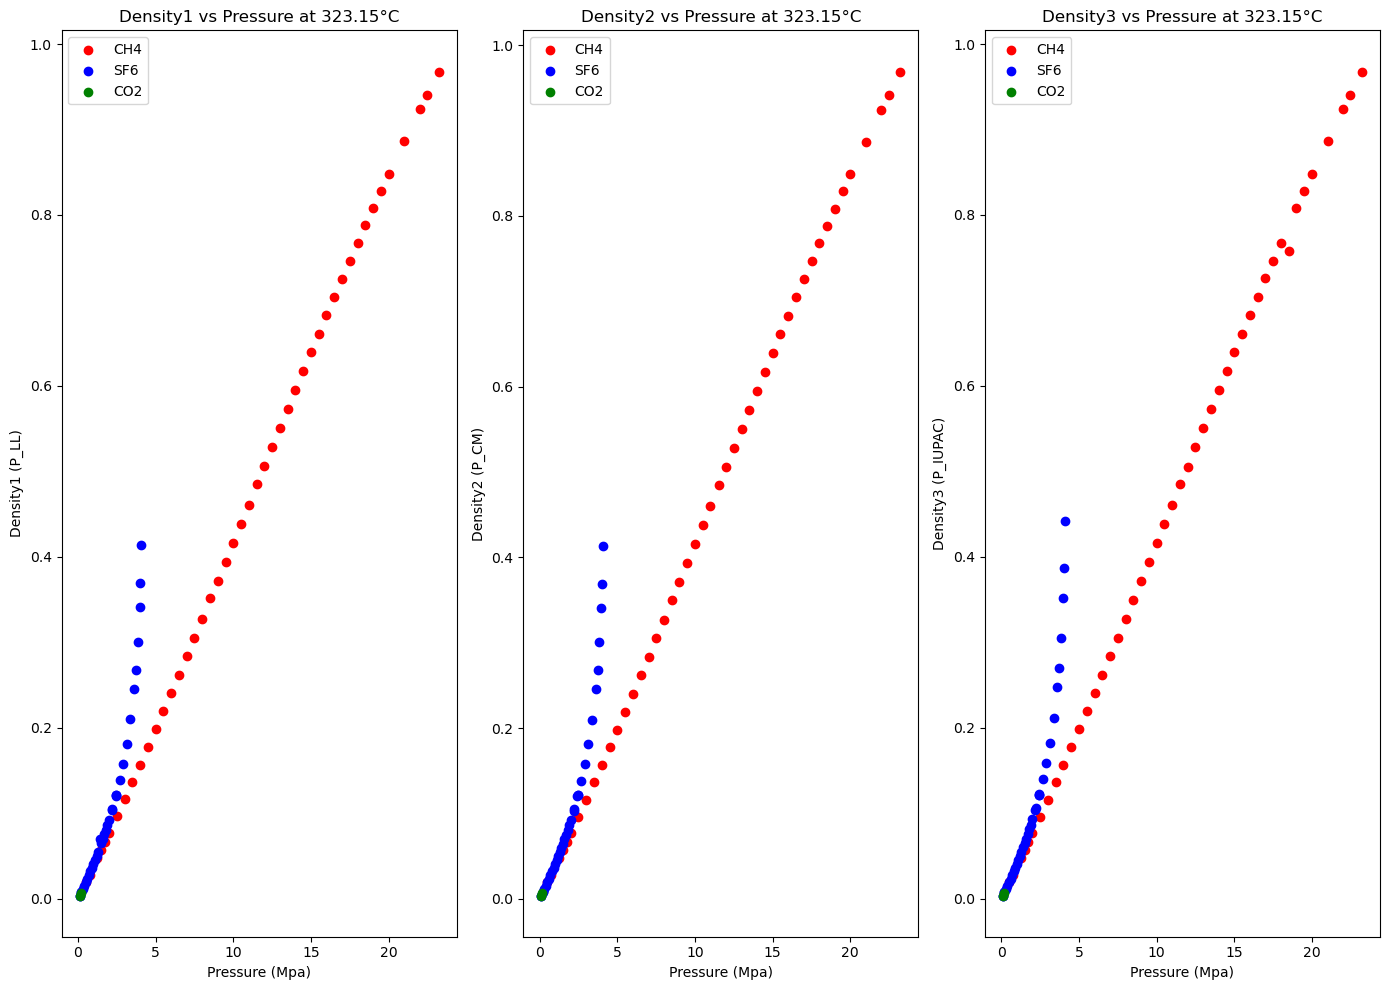

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Gas_sensor_dataset (1) (1) (1).csv')

# Define colors for each gas
colors = {'CH4': 'red', 'SF6': 'blue', 'CO2': 'green'}

# Specific temperature
specific_temp = 323.15  # Change this to your desired temperature

# Filter data for the specific temperature
data_specific_temp = data[data['Temperature (K)'] == specific_temp]

# Plot all densities vs Pressure using subplots
plt.figure(figsize=(14, 10))

# Plot Density1 vs Pressure
plt.subplot(1, 3, 1)
for gas, color in colors.items():
    plt.scatter(data_specific_temp[data_specific_temp['Target'] == gas]['Pressure (Mpa)'],
                data_specific_temp[data_specific_temp['Target'] == gas]['Density1(P_LL)'],
                c=color, label=gas)
plt.xlabel('Pressure (Mpa)')
plt.ylabel('Density1 (P_LL)')
plt.title('Density1 vs Pressure at {}°C'.format(specific_temp))
plt.legend()

# Plot Density2 vs Pressure
plt.subplot(1, 3, 2)
for gas, color in colors.items():
    plt.scatter(data_specific_temp[data_specific_temp['Target'] == gas]['Pressure (Mpa)'],
                data_specific_temp[data_specific_temp['Target'] == gas]['Density2(P_CM)'],
                c=color, label=gas)
plt.xlabel('Pressure (Mpa)')
plt.ylabel('Density2 (P_CM)')
plt.title('Density2 vs Pressure at {}°C'.format(specific_temp))
plt.legend()

# Plot Density3 vs Pressure
plt.subplot(1, 3, 3)
for gas, color in colors.items():
    plt.scatter(data_specific_temp[data_specific_temp['Target'] == gas]['Pressure (Mpa)'],
                data_specific_temp[data_specific_temp['Target'] == gas]['Density3(P_IUPAC)'],
                c=color, label=gas)
plt.xlabel('Pressure (Mpa)')
plt.ylabel('Density3 (P_IUPAC)')
plt.title('Density3 vs Pressure at {}°C'.format(specific_temp))
plt.legend()

plt.tight_layout()
plt.show()


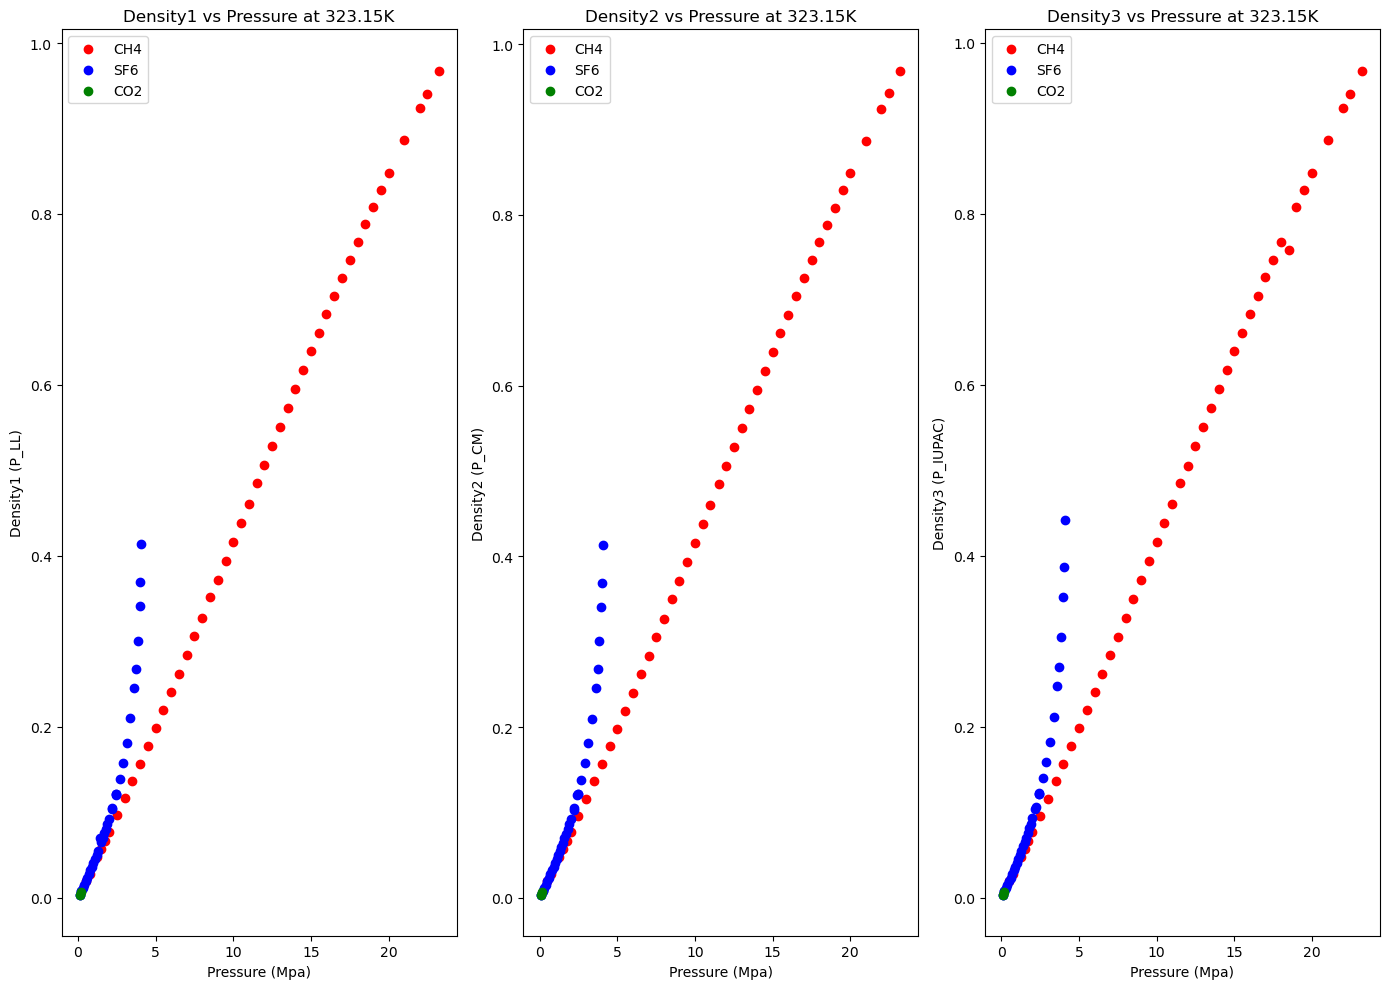

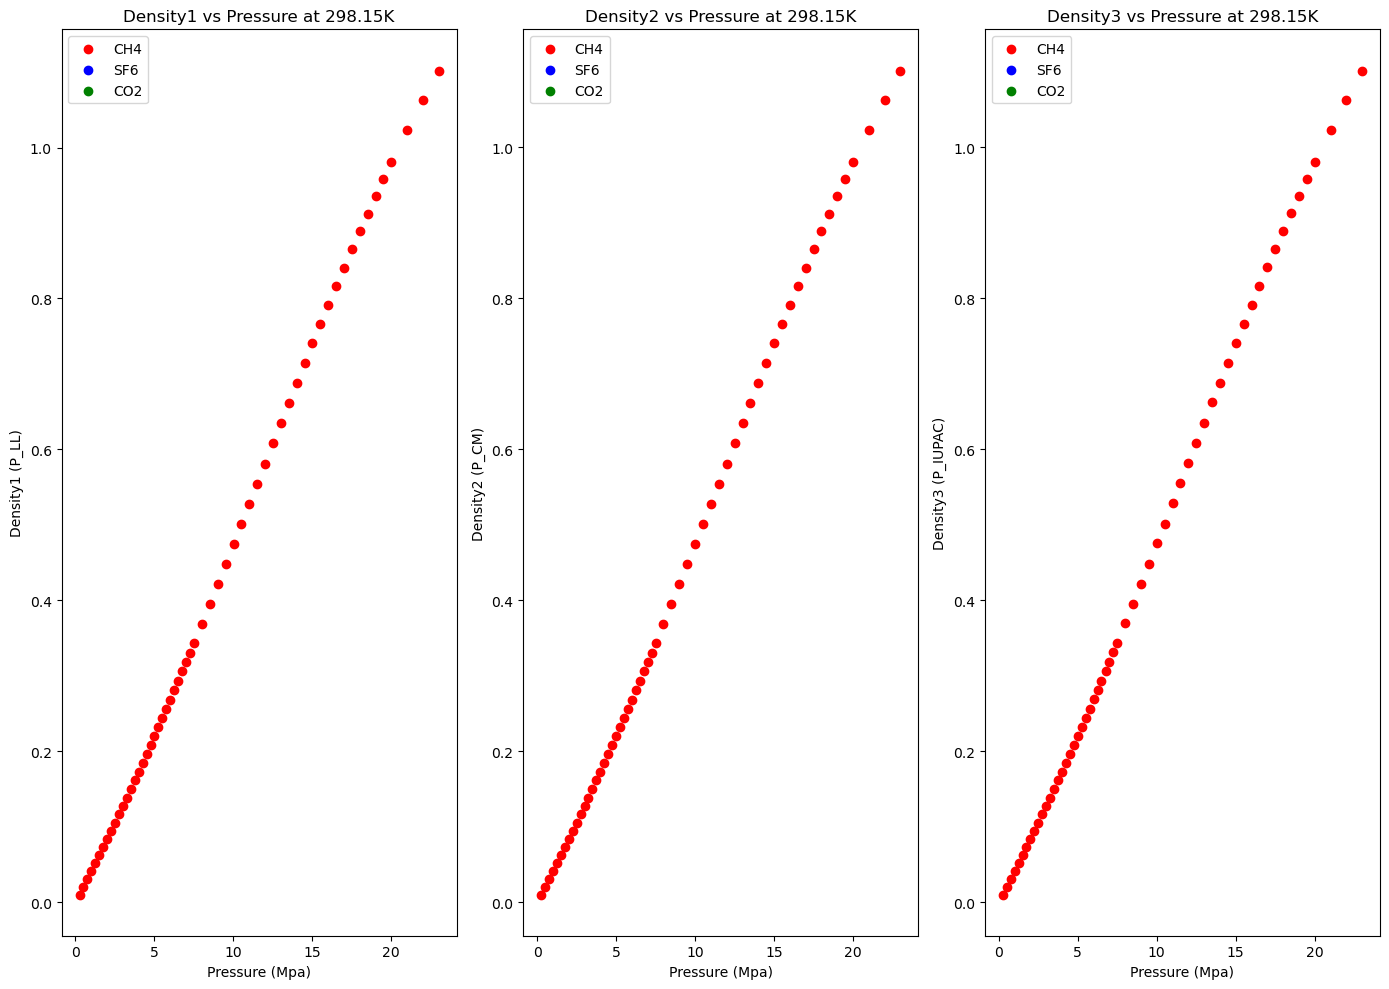

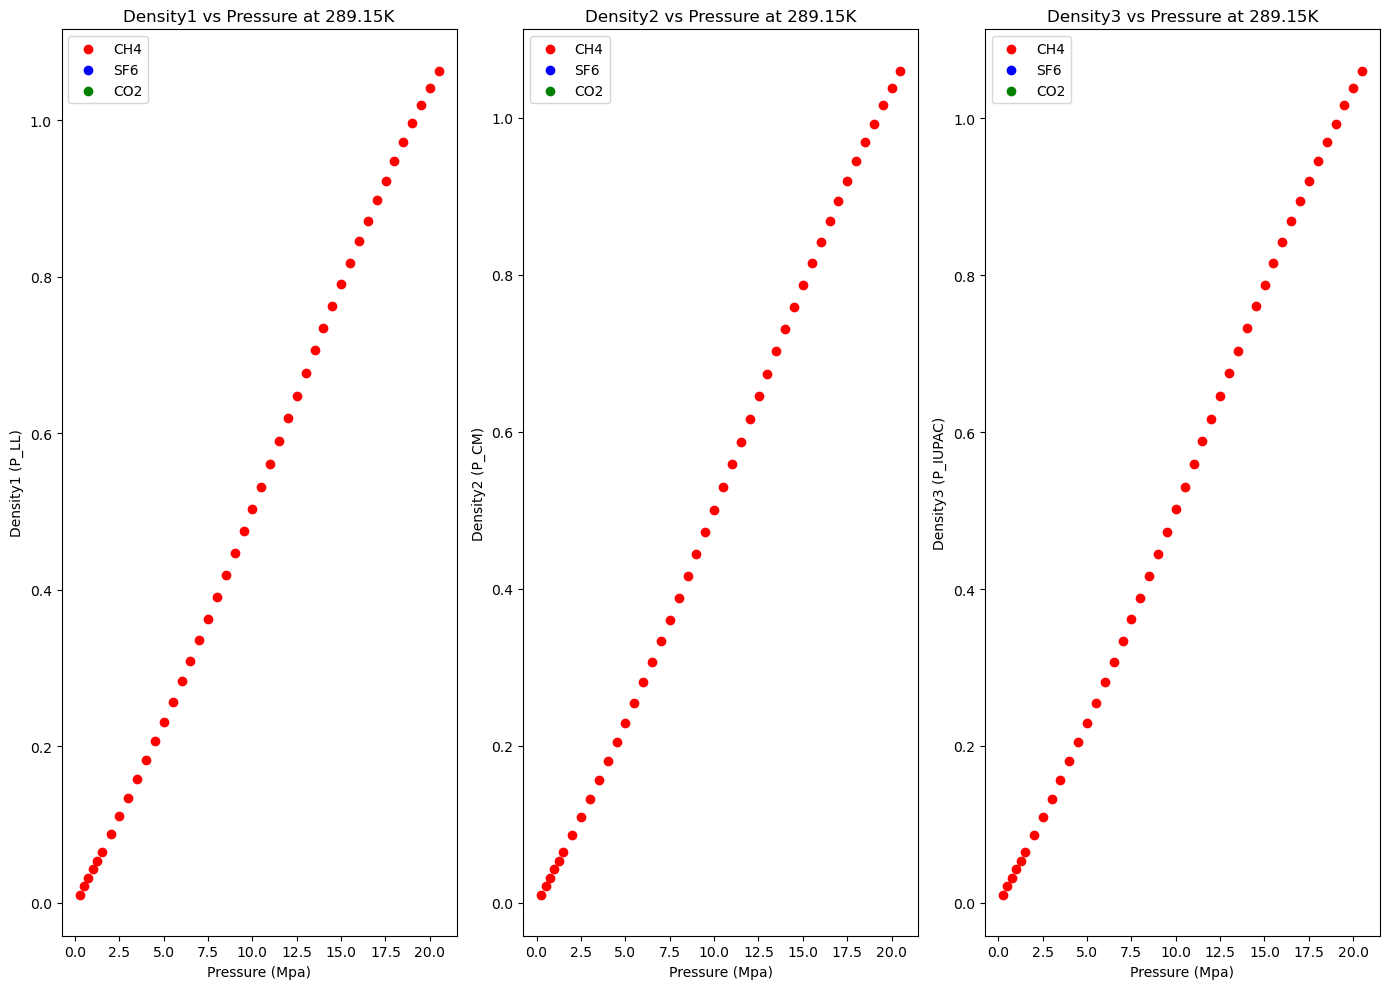

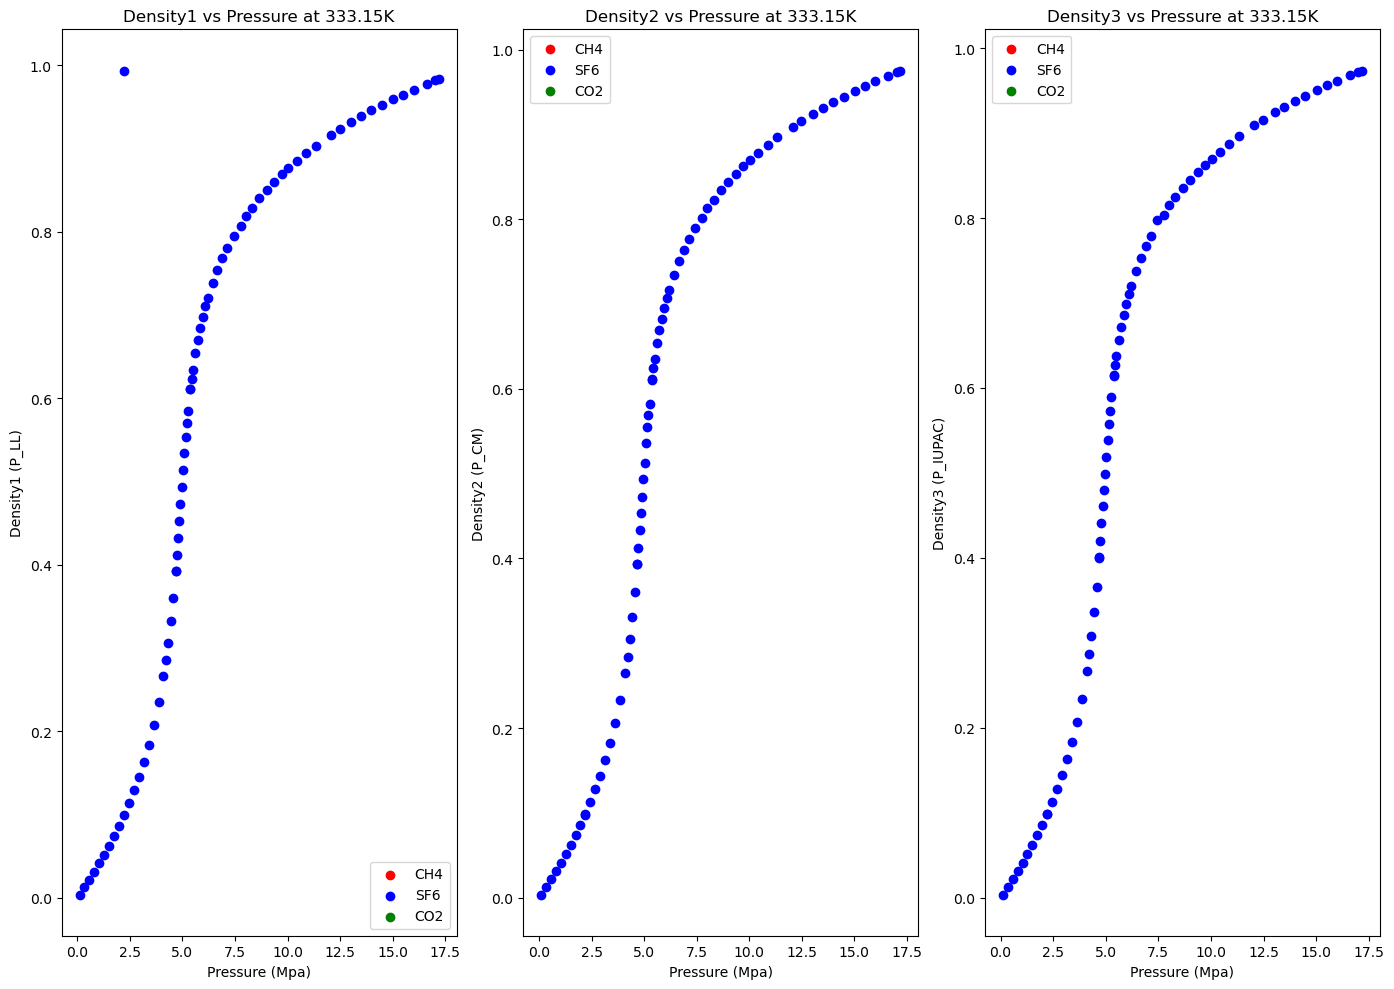

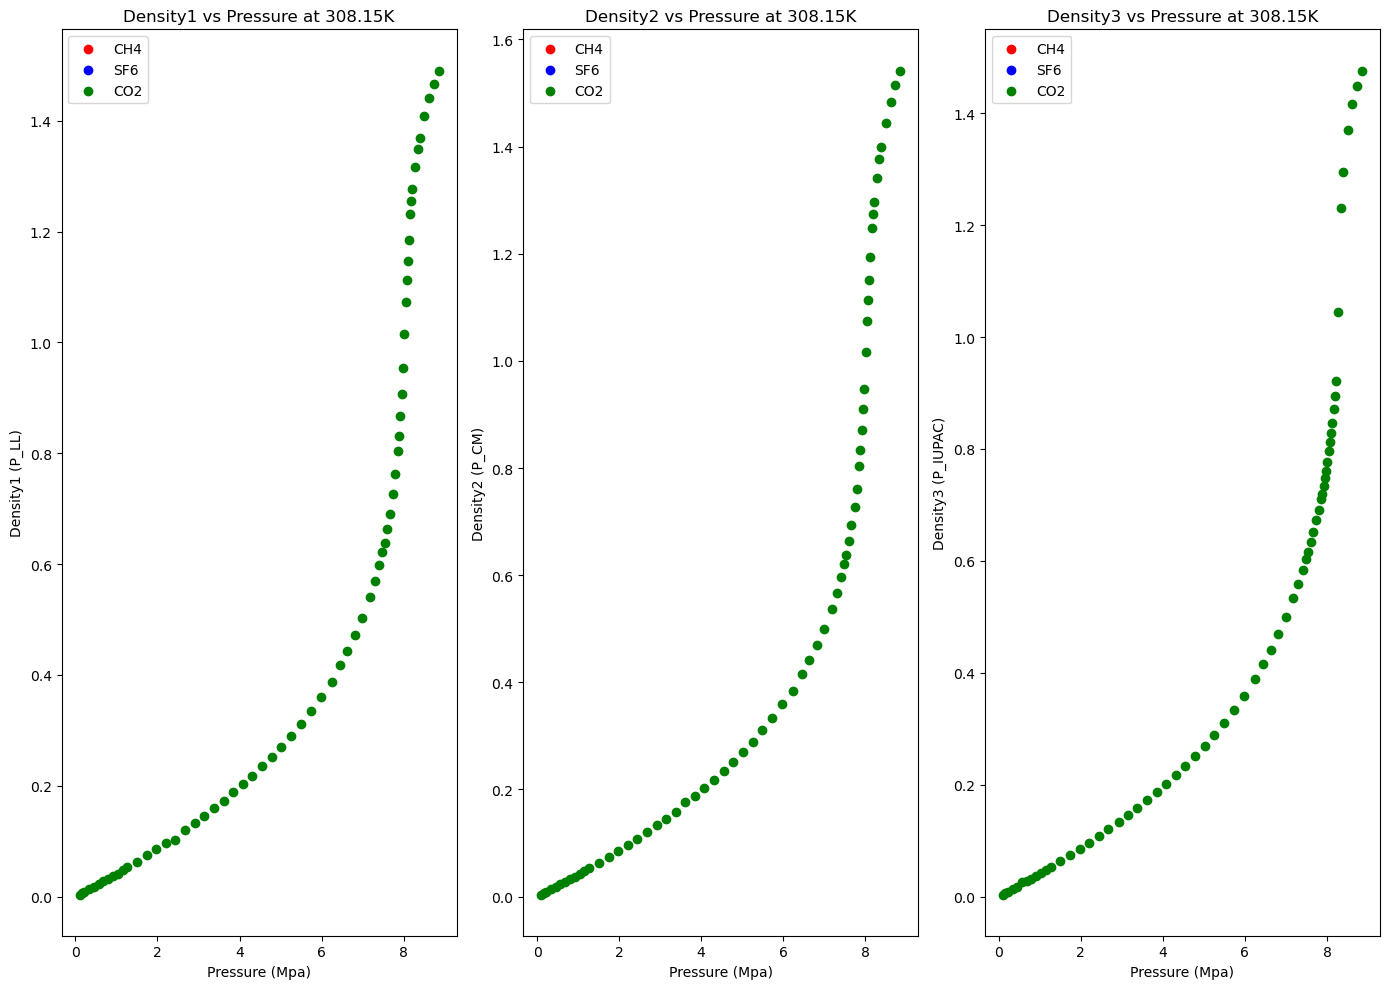

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Gas_sensor_dataset (1) (1) (1).csv')

# Define colors for each gas
colors = {'CH4': 'red', 'SF6': 'blue', 'CO2': 'green'}

# Specific temperatures
specific_temperatures = [323.15, 298.15, 289.15, 333.15, 308.15]  # Update this list with your specific temperatures

# Loop through each specific temperature
for temp in specific_temperatures:
    # Filter data for the specific temperature
    data_specific_temp = data[data['Temperature (K)'] == temp]
    
    # Plot all densities vs Pressure using subplots
    plt.figure(figsize=(14, 10))

    # Plot Density1 vs Pressure
    plt.subplot(1, 3, 1)
    for gas, color in colors.items():
        plt.scatter(data_specific_temp[data_specific_temp['Target'] == gas]['Pressure (Mpa)'],
                    data_specific_temp[data_specific_temp['Target'] == gas]['Density1(P_LL)'],
                    c=color, label=gas)
    plt.xlabel('Pressure (Mpa)')
    plt.ylabel('Density1 (P_LL)')
    plt.title('Density1 vs Pressure at {}K'.format(temp))
    plt.legend()

    # Plot Density2 vs Pressure
    plt.subplot(1, 3, 2)
    for gas, color in colors.items():
        plt.scatter(data_specific_temp[data_specific_temp['Target'] == gas]['Pressure (Mpa)'],
                    data_specific_temp[data_specific_temp['Target'] == gas]['Density2(P_CM)'],
                    c=color, label=gas)
    plt.xlabel('Pressure (Mpa)')
    plt.ylabel('Density2 (P_CM)')
    plt.title('Density2 vs Pressure at {}K'.format(temp))
    plt.legend()

    # Plot Density3 vs Pressure
    plt.subplot(1, 3, 3)
    for gas, color in colors.items():
        plt.scatter(data_specific_temp[data_specific_temp['Target'] == gas]['Pressure (Mpa)'],
                    data_specific_temp[data_specific_temp['Target'] == gas]['Density3(P_IUPAC)'],
                    c=color, label=gas)
    plt.xlabel('Pressure (Mpa)')
    plt.ylabel('Density3 (P_IUPAC)')
    plt.title('Density3 vs Pressure at {}K'.format(temp))
    plt.legend()

    plt.tight_layout()
    plt.show()


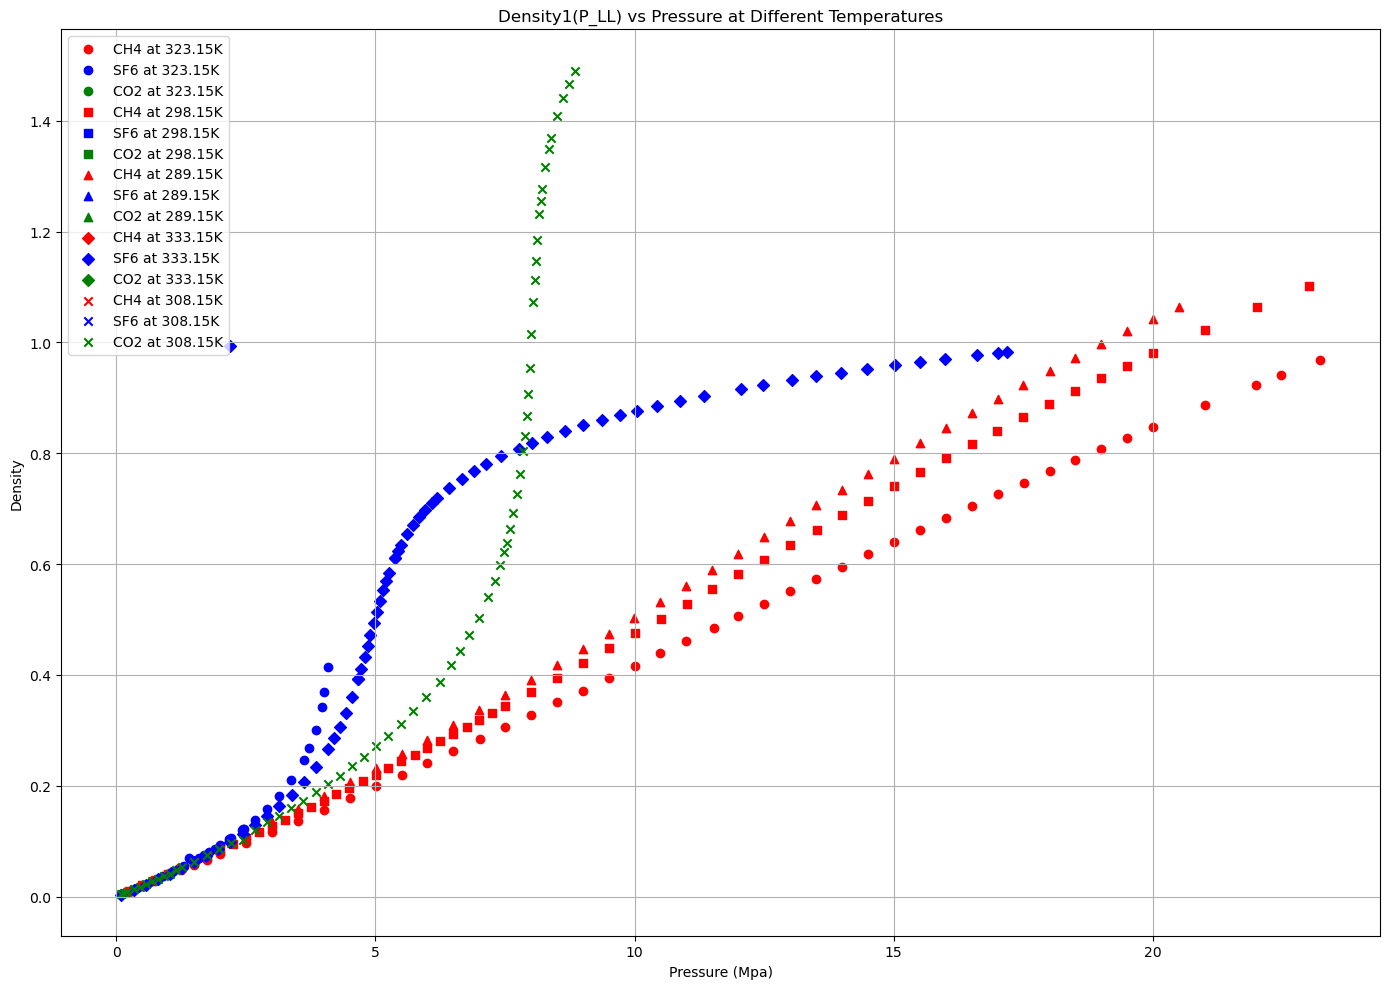

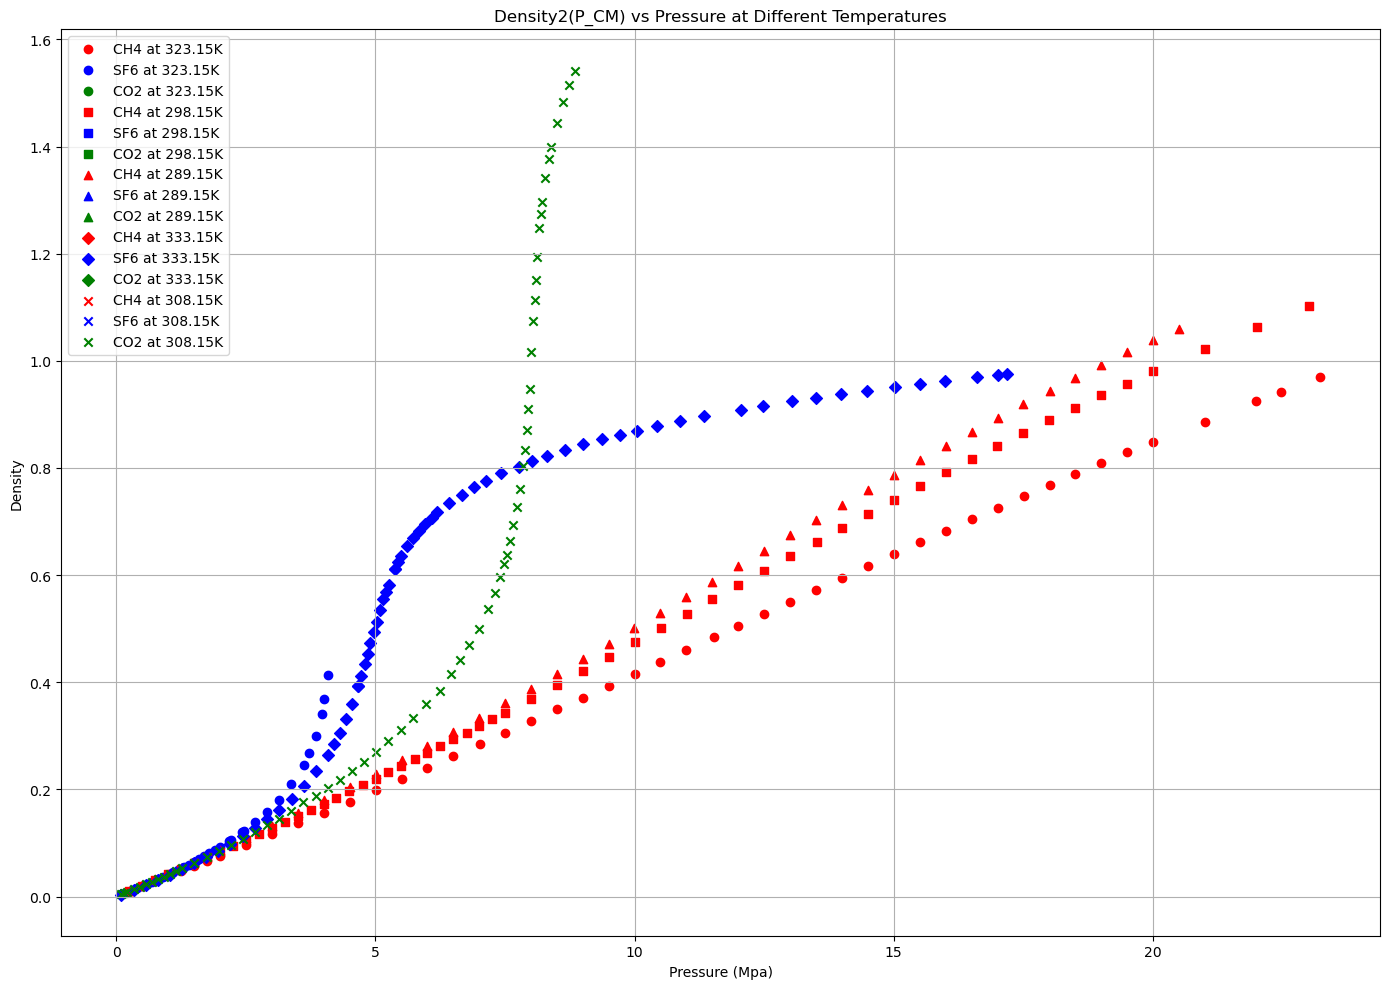

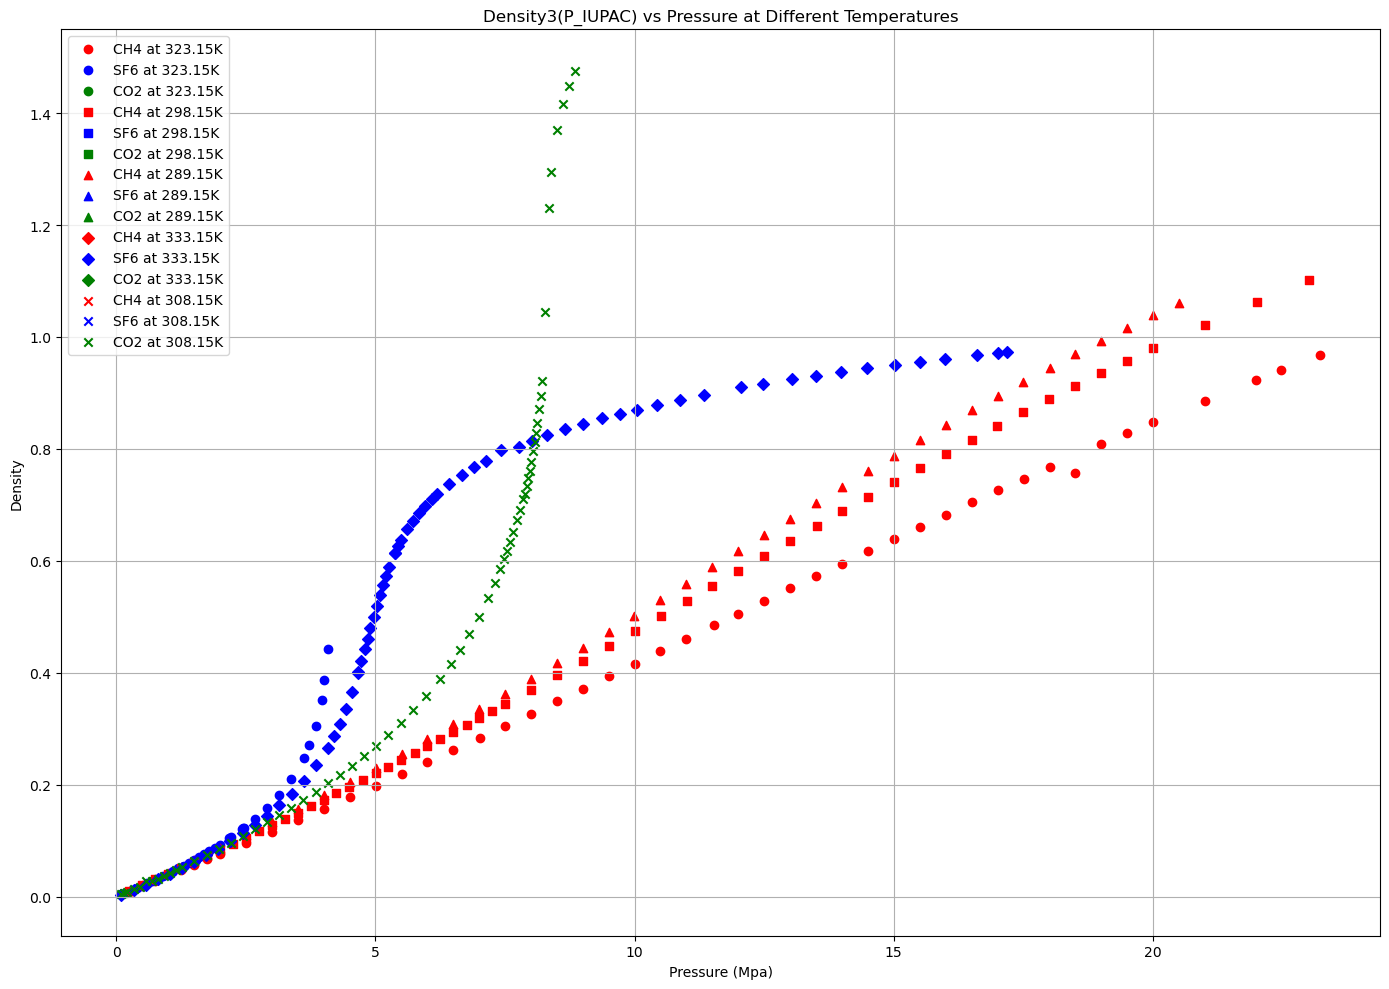

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Gas_sensor_dataset (1) (1) (1).csv')

# Define colors for each gas
colors = {'CH4': 'red', 'SF6': 'blue', 'CO2': 'green'}

# Define markers for each temperature
markers = ['o', 's', '^', 'D', 'x']

# Specific temperatures
specific_temperatures = [323.15, 298.15, 289.15, 333.15, 308.15]  # Update this list with your specific temperatures

# Loop through each density measurement
for density_measurement in ['Density1(P_LL)', 'Density2(P_CM)', 'Density3(P_IUPAC)']:
    # Create a figure
    plt.figure(figsize=(14, 10))

    # Loop through each specific temperature
    for i, temp in enumerate(specific_temperatures):
        # Filter data for the specific temperature
        data_specific_temp = data[data['Temperature (K)'] == temp]

        # Plot for the current density measurement
        for gas, color in colors.items():
            plt.scatter(data_specific_temp[data_specific_temp['Target'] == gas]['Pressure (Mpa)'],
                        data_specific_temp[data_specific_temp['Target'] == gas][density_measurement],
                        c=color, label=gas + ' at {}K'.format(temp),
                        marker=markers[i])

    # Set labels and title
    plt.xlabel('Pressure (Mpa)')
    plt.ylabel('Density')
    plt.title('{} vs Pressure at Different Temperatures'.format(density_measurement))

    # Add legend
    plt.legend()

    # Show plot
    plt.grid(True)
    plt.tight_layout()
    plt.show()
